<h1>EDA Project - Spotify Track Popularity Analysis</h1>

<h2>Project Overview</h2>

Spotify is a global music streaming platform that provides users with access to songs and podcasts through free and premium subscriptions. One of Spotify’s core capabilities is its recommendation system, which uses machine learning techniques to personalise music discovery through features like Discover Weekly and Release Radar. These systems rely heavily on understanding what makes a track popular and how popularity evolves over time.

Spotify uses a wide variety of features such as audio features, listening behaviour, cultural trends, and historical performance to predict user preferences and forecast future hits. Being able to accurately identify popular tracks is essential for to curate relevant recommendations to users.

<h2>Problem Statement</h2>

The objective of this project is to explore and compare the characteristics of high-popularity and low-popularity Spotify tracks to identify patterns and relationships that may influence a song’s success on the platform.

The analysis uses two datasets containing selected Spotify tracks released between 1978 and 2024:

- One dataset representing high-popularity tracks (`high_popularity_spotify_data.csv`)
- One dataset representing low-popularity tracks (`low_popularity_spotify_data.csv`)

By conducting exploratory data analysis (EDA), this project aims to uncover meaningful trends, distributions, and correlations between track features and popularity.


<h2>Methodology</h2>

At a high-level, I will be conducting:
- <b>Univariate analysis</b> to examine distribution of individual features
- <b>Comparative analysis</b> to identify differences between high and low-popularity tracks
- <b>Correlation analysis</b> to assess the strength and direction of relationships between popularity and musical attributes
- <b>Pattern discovery</b> to highlight features most strongly associated with track success

The findings from these analyses are used to identify meaningful trends and guide my investigation into factors that may influence Spotify track popularity.


<h2>The Dataset</h2>

The link to the dataset used for this task can be found on <a href="https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset?select=low_popularity_spotify_data.csv">Kaggle</a>

<h3>Audio Features</h3>

| Feature           | Description                                                                                  |
|:----------------- |:-------------------------------------------------------------------------------------------- |
| Energy            | A measure of intensity and activity. Energetic tracks feel fast, loud, and noisy.            |
| Tempo             | The speed of a track, measured in beats per minute (BPM).                                    |
| Danceability      | How suitable a track is for dancing based on tempo, rhythm stability, beat strength, etc.   |
| Loudness          | Overall loudness of a track in decibels (dB). Higher values indicate louder tracks.         |
| Liveness          | Likelihood of a track being performed live; higher values suggest more audience presence.   |
| Valence           | Musical positiveness (emotion). High valence = happy, low valence = sad/angry.             |
| Speechiness       | Measures the presence of spoken words in a track.                                           |
| Instrumentalness  | Likelihood a track contains no vocals; closer to 1.0 = fully instrumental.                  |
| Mode              | Indicates the modality of the track (major/minor).                                           |
| Key               | Musical key as an integer from 0–11 (Pitch class notation).                                  |
| Duration_ms       | Length of the track in milliseconds.                                                        |
| Acousticness      | Confidence that a track is acoustic (1) or not (0). 



<h3>Descriptive/Metadata Features</h3>

| Feature                  | Description                                                               |
| ------------------------ | ------------------------------------------------------------------------- |
| Track Name               | The name of the track.                                                    |
| Track Artist             | The artist(s) performing the track.                                       |
| Track Album Name         | The album in which the track appears.                                     |
| Track Album Release Date | Release date of the album containing the track.                           |
| Track ID                 | Unique identifier assigned to the track by Spotify.                       |
| Track Album ID           | Unique identifier for the album.                                          |
| Playlist Name            | The name of the playlist including the track.                             |
| Playlist Genre           | Main genre associated with the playlist (e.g., pop, rock, classical).     |
| Playlist Subgenre        | More specific subgenre tied to the playlist (e.g., indie pop, punk rock). |
| Playlist ID              | Unique identifier for the playlist.                                       |
| Track Popularity         | Score (0–100) calculated based on total streams relative to other tracks. |


<h3>Import Data</h3>

As mentioned above, there are two separate datasets for high and low popularity songs. For ease of analysis, I will merge this into one unified data frame which will facilitate analysis. Both datasets contain the same attributes and features - so a simple concatenation would work.

In [61]:
import numpy as np 

high_popularity = pd.read_csv("high_popularity_spotify_data.csv")
low_popularity = pd.read_csv("low_popularity_spotify_data.csv")


df = pd.concat([high_popularity, low_popularity])

Now let's verify that the datasets were merged correctly:

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4831 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4830 non-null   object 
 14  playlist_name

We can also preview the dataset too:

In [63]:
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


Upon calling `df.info()` earlier, an initial inspection showed that there are a small number of missing values in some columns. This will need to be cleaned accordingly - first verify the null counts in each column in the `DataFrame`

In [64]:
isnan = df.isna()

for column in isnan.columns.values.tolist():
    print(column)
    print(isnan[column].value_counts())

energy
energy
False    4830
True        1
Name: count, dtype: int64
tempo
tempo
False    4830
True        1
Name: count, dtype: int64
danceability
danceability
False    4830
True        1
Name: count, dtype: int64
playlist_genre
playlist_genre
False    4831
Name: count, dtype: int64
loudness
loudness
False    4830
True        1
Name: count, dtype: int64
liveness
liveness
False    4830
True        1
Name: count, dtype: int64
valence
valence
False    4830
True        1
Name: count, dtype: int64
track_artist
track_artist
False    4831
Name: count, dtype: int64
time_signature
time_signature
False    4830
True        1
Name: count, dtype: int64
speechiness
speechiness
False    4830
True        1
Name: count, dtype: int64
track_popularity
track_popularity
False    4831
Name: count, dtype: int64
track_href
track_href
False    4830
True        1
Name: count, dtype: int64
uri
uri
False    4830
True        1
Name: count, dtype: int64
track_album_name
track_album_name
False    4830
True        1


We can subsequently see that features such as `acousticness`, `duration_ms`, `mode`, `key`, `instrumentalness`, `energy`, `tempo`, and `danceability` all have a small number of missing or null values. Depending on the type of attribute, we will need to deal with these differently. 

For continuous features, we can simply impute them with the mean value in that column. 

In [65]:
continuous_cols = [
    "energy",
    "tempo",
    "danceability",
    "loudness",
    "liveness",
    "valence",
    "speechiness",
    "instrumentalness",
    "acousticness",
    "duration_ms"
]
df[continuous_cols] = df[continuous_cols].apply(
    lambda col: col.fillna(col.mean())
)

For categorical variables with missing values, since only a very small number of records are affected, it would not meaningful to impute these values using the most frequent category. Instead, the affected rows can be safely removed without impacting the overall dataset.

In [66]:
categorical_cols = [
    "track_album_name",
    "track_href",
    "uri",
    "analysis_url",
    "type",
]

df = df.dropna(subset=categorical_cols)

Now we can verify that there are no more null values in the dataset:

In [67]:
isnan = df.isna()

for column in isnan.columns.values.tolist(): 
    print(column)
    print(isnan[column].value_counts())


energy
energy
False    4829
Name: count, dtype: int64
tempo
tempo
False    4829
Name: count, dtype: int64
danceability
danceability
False    4829
Name: count, dtype: int64
playlist_genre
playlist_genre
False    4829
Name: count, dtype: int64
loudness
loudness
False    4829
Name: count, dtype: int64
liveness
liveness
False    4829
Name: count, dtype: int64
valence
valence
False    4829
Name: count, dtype: int64
track_artist
track_artist
False    4829
Name: count, dtype: int64
time_signature
time_signature
False    4829
Name: count, dtype: int64
speechiness
speechiness
False    4829
Name: count, dtype: int64
track_popularity
track_popularity
False    4829
Name: count, dtype: int64
track_href
track_href
False    4829
Name: count, dtype: int64
uri
uri
False    4829
Name: count, dtype: int64
track_album_name
track_album_name
False    4829
Name: count, dtype: int64
playlist_name
playlist_name
False    4829
Name: count, dtype: int64
analysis_url
analysis_url
False    4829
Name: count, dtype: 

<h2>Exploratory Data Analysis</h2>

Earlier, we observed that the dataset contains 29 columns and 4831 rows. Before performing more detailed analysis, it is important to first understand the basic characteristics of the data. This allows us to examine the general distribution of variables, identify any potential outliers or extreme values, and inform subsequent preprocessing or analysis steps. This initial overview is commonly referred to as <b>descriptive statistics</b>.

In [68]:
print(df.describe())

            energy        tempo  danceability     loudness     liveness  \
count  4829.000000  4829.000000   4829.000000  4829.000000  4829.000000   
mean      0.586621   118.271840      0.622299    -9.283028     0.167609   
std       0.246240    28.515018      0.187723     7.129469     0.124442   
min       0.000202    48.232000      0.058900   -48.069000     0.021000   
25%       0.442000    96.063000      0.525000   -10.298000     0.095400   
50%       0.633000   118.068000      0.653000    -7.191000     0.118000   
75%       0.777000   136.732000      0.758000    -5.339000     0.195000   
max       0.998000   241.426000      0.979000     1.318000     0.979000   

           valence  time_signature  speechiness  track_popularity  \
count  4829.000000     4829.000000  4829.000000       4829.000000   
mean      0.481851        3.936633     0.101747         54.758335   
std       0.258006        0.409753     0.101040         19.830824   
min       0.029600        1.000000     0.021900 

From the descriptive statistics, we can see that some continuous features contain extreme values relative to the general distribution. 

For example, a few tracks have extremely long durations (about 22 minutes), very low `loudness` (about 48 dB), unusually high `tempo` (about 241 BPM), or very high `speechiness` (~0.93). These values are considered outliers because they differ substantially from the majority of tracks. To ensure that the analysis we do later on is robust and the insights are meaningful, we remove these outliers from all continuous features before proceeding.

In [69]:
from scipy import stats

# List of numerical/continuous columns
continuous_cols = [
    "energy", "tempo", "danceability", "loudness", "liveness",
    "valence", "speechiness", "instrumentalness", "acousticness",
    "duration_ms", "track_popularity"
]

# Compute Z-scores for all continuous columns
z_scores = np.abs(stats.zscore(df[continuous_cols]))

# Keep rows where all Z-scores are below 3
df_clean = df[(z_scores < 3).all(axis=1)]


print(f"Rows before removing outliers: {df.shape[0]}")
print(f"Rows after removing outliers: {df_clean.shape[0]}")

Rows before removing outliers: 4829
Rows after removing outliers: 4403


<h3>Data Standardization</h3>

To make the analysis more interpretable later on, we will convert the `duration_ms` feature into minutes. This is more meaningful for song analysis, and allows comparison whilst preserving the standard spread of values.

In [70]:
df["duration_ms"] = df["duration_ms"] * 0.0000166667

df.rename(columns={"duration_ms": "Duration_mins"}, inplace=True) 


<h3>Data Normalization</h3>

In [71]:
df.describe(include=["float64"])

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,instrumentalness,mode,key,Duration_mins,acousticness
count,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,0.586621,118.271840,0.622299,-9.283028,0.167609,0.481851,3.936633,0.101747,0.201094,0.562228,5.233796,3.436003,0.341279
std,0.246240,28.515018,0.187723,7.129469,0.124442,0.258006,0.409753,0.101040,0.351943,0.496164,3.581084,1.362530,0.325387
min,0.000202,48.232000,0.058900,-48.069000,0.021000,0.029600,1.000000,0.021900,0.000000,0.000000,0.000000,0.589585,0.000004
25%,0.442000,96.063000,0.525000,-10.298000,0.095400,0.275000,4.000000,0.038600,0.000000,0.000000,2.000000,2.650005,0.053000
50%,0.633000,118.068000,0.653000,-7.191000,0.118000,0.483000,4.000000,0.056100,0.000092,1.000000,5.000000,3.248006,0.225000
75%,0.777000,136.732000,0.758000,-5.339000,0.195000,0.690000,4.000000,0.118000,0.201000,1.000000,8.000000,3.891308,0.590000
max,0.998000,241.426000,0.979000,1.318000,0.979000,0.987000,5.000000,0.927000,0.991000,1.000000,11.000000,22.587712,0.996000


From `df.describe()`, we can see that certain variables, such as `loudness`, `tempo`, and `duration`, have scales that differ greatly from other features.

This suggests that normalization may be beneficial, particularly for modelling later on, to ensure that all features contribute equally.

However, before normalizing, it is important to examine the underlying distributions of these features. If a feature is approximately Gaussian, standard normalization may suffice, whereas non-Gaussian or unknown distributions provide stronger evidence for normalization or alternative scaling methods. Visualizing the distributions allows us to make an informed decision about appropriate preprocessing steps.

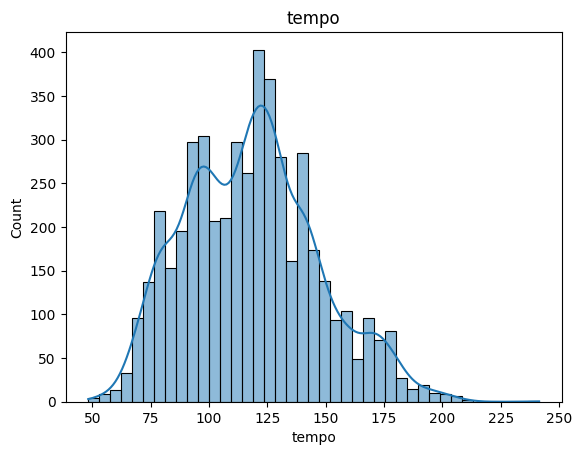

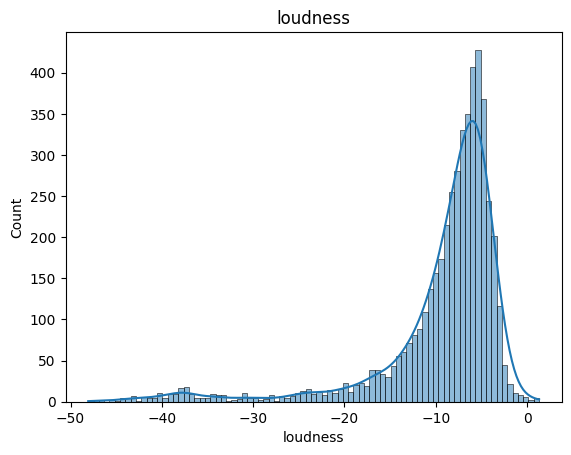

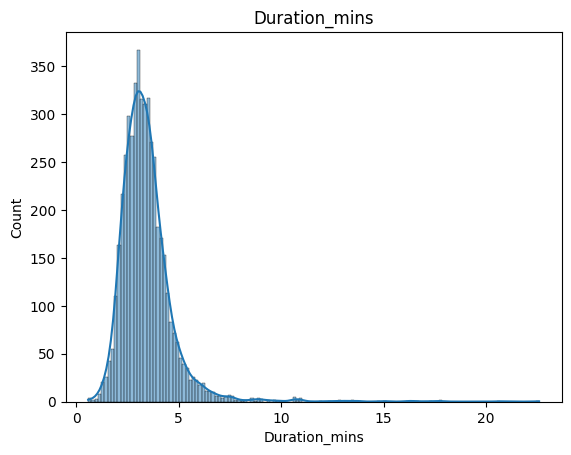

In [72]:
for col in ["tempo", "loudness", "Duration_mins"]:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


From the histogram plots above, it is evident that none of the continuous features exhibit Gaussian distributions. This reinforces the need for normalization to ensure that variables on different scales contribute appropriately in subsequent analysis or modeling.

Note that categorical or discrete variables such as `time_signature`, `mode`, and `key` are not normalized, as scaling these features would not be meaningful or appropriate in this context.

In [73]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = ["tempo", "loudness", "Duration_mins"]
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

df.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,Duration_mins,acousticness
count,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,0.586621,0.362536,0.622299,0.785348,0.167609,0.481851,3.936633,0.101747,54.758335,0.201094,0.562228,5.233796,0.129394,0.341279
std,0.246240,0.147598,0.187723,0.144359,0.124442,0.258006,0.409753,0.101040,19.830824,0.351943,0.496164,3.581084,0.061938,0.325387
min,0.000202,0.000000,0.058900,0.000000,0.021000,0.029600,1.000000,0.021900,11.000000,0.000000,0.000000,0.000000,0.000000,0.000004
25%,0.442000,0.247580,0.525000,0.764796,0.095400,0.275000,4.000000,0.038600,41.000000,0.000000,0.000000,2.000000,0.093663,0.053000
50%,0.633000,0.361481,0.653000,0.827708,0.118000,0.483000,4.000000,0.056100,56.000000,0.000092,1.000000,5.000000,0.120848,0.225000
75%,0.777000,0.458089,0.758000,0.865207,0.195000,0.690000,4.000000,0.118000,72.000000,0.201000,1.000000,8.000000,0.150091,0.590000
max,0.998000,1.000000,0.979000,1.000000,0.979000,0.987000,5.000000,0.927000,100.000000,0.991000,1.000000,11.000000,1.000000,0.996000


Furthermore, earlier we also identified that some columns, such as `speechiness`, `instrumentalness`, `acousticness` and `liveness` were rounded to a different number of decimal places. To allow for comparability in analysis, we will make sure these features are rounded to 3 decimal places for consistency.

In [113]:
df[['speechiness', 'instrumentalness', 'acousticness', 'liveness']] = np.round(df[['speechiness', 'instrumentalness', 'acousticness', 'liveness']],3)

<h2>Univariate Analysis</h2>

The goal is to identify which features in the dataset have the greatest influence on track popularity. To identify this, we will calculate <b>Pearson correlations</b> across all variables, allowing us to identify the attributes most closely associated with song success.

In [74]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,Duration_mins,acousticness
energy,1.000000,0.197822,0.387119,0.798808,0.192597,0.491455,0.196884,0.133954,0.194502,-0.564682,-0.078709,0.039974,0.125376,-0.750997
tempo,0.197822,1.000000,0.019833,0.162036,0.047036,0.088247,-0.009553,0.063887,0.059954,-0.124890,0.007642,0.013567,0.031931,-0.173186
danceability,0.387119,0.019833,1.000000,0.557789,0.000973,0.513625,0.199446,0.256270,0.128340,-0.349467,-0.122638,0.024582,-0.140688,-0.381200
loudness,0.798808,0.162036,0.557789,1.000000,0.154199,0.471091,0.217900,0.178681,0.216958,-0.641593,-0.096726,0.045712,0.070637,-0.647247
liveness,0.192597,0.047036,0.000973,0.154199,1.000000,0.067124,0.029161,0.097277,0.022226,-0.119115,-0.014182,0.007340,-0.002951,-0.136944
valence,0.491455,0.088247,0.513625,0.471091,0.067124,1.000000,0.140053,0.161619,0.096567,-0.427594,-0.062014,0.033723,-0.035817,-0.351412
time_signature,0.196884,-0.009553,0.199446,0.217900,0.029161,0.140053,1.000000,0.108609,0.003213,-0.139062,-0.003014,-0.003735,-0.018882,-0.199065
speechiness,0.133954,0.063887,0.256270,0.178681,0.097277,0.161619,0.108609,1.000000,0.019330,-0.209209,-0.087537,0.016863,-0.096588,-0.119140
track_popularity,0.194502,0.059954,0.128340,0.216958,0.022226,0.096567,0.003213,0.019330,1.000000,-0.263070,0.003307,0.029297,0.021566,-0.232543
instrumentalness,-0.564682,-0.124890,-0.349467,-0.641593,-0.119115,-0.427594,-0.139062,-0.209209,-0.263070,1.000000,0.025338,-0.025121,-0.141165,0.511565


From the table above, we can see that the Pearson correlation scores across all features and the target variable (`track_popularity`) are quite low -  This indicates that linear relationships between individual features and popularity are weak or negligible, suggesting that a simple linear model would not effectively capture the underlying patterns and would lead to underfitting. 

Given this, it is more appropriate to explore non-linear relationships between features and popularity. To do this, we start with <b>Spearman’s rank correlation</b>, which measures monotonic relationships and is better suited for detecting non-linear associations between variables.

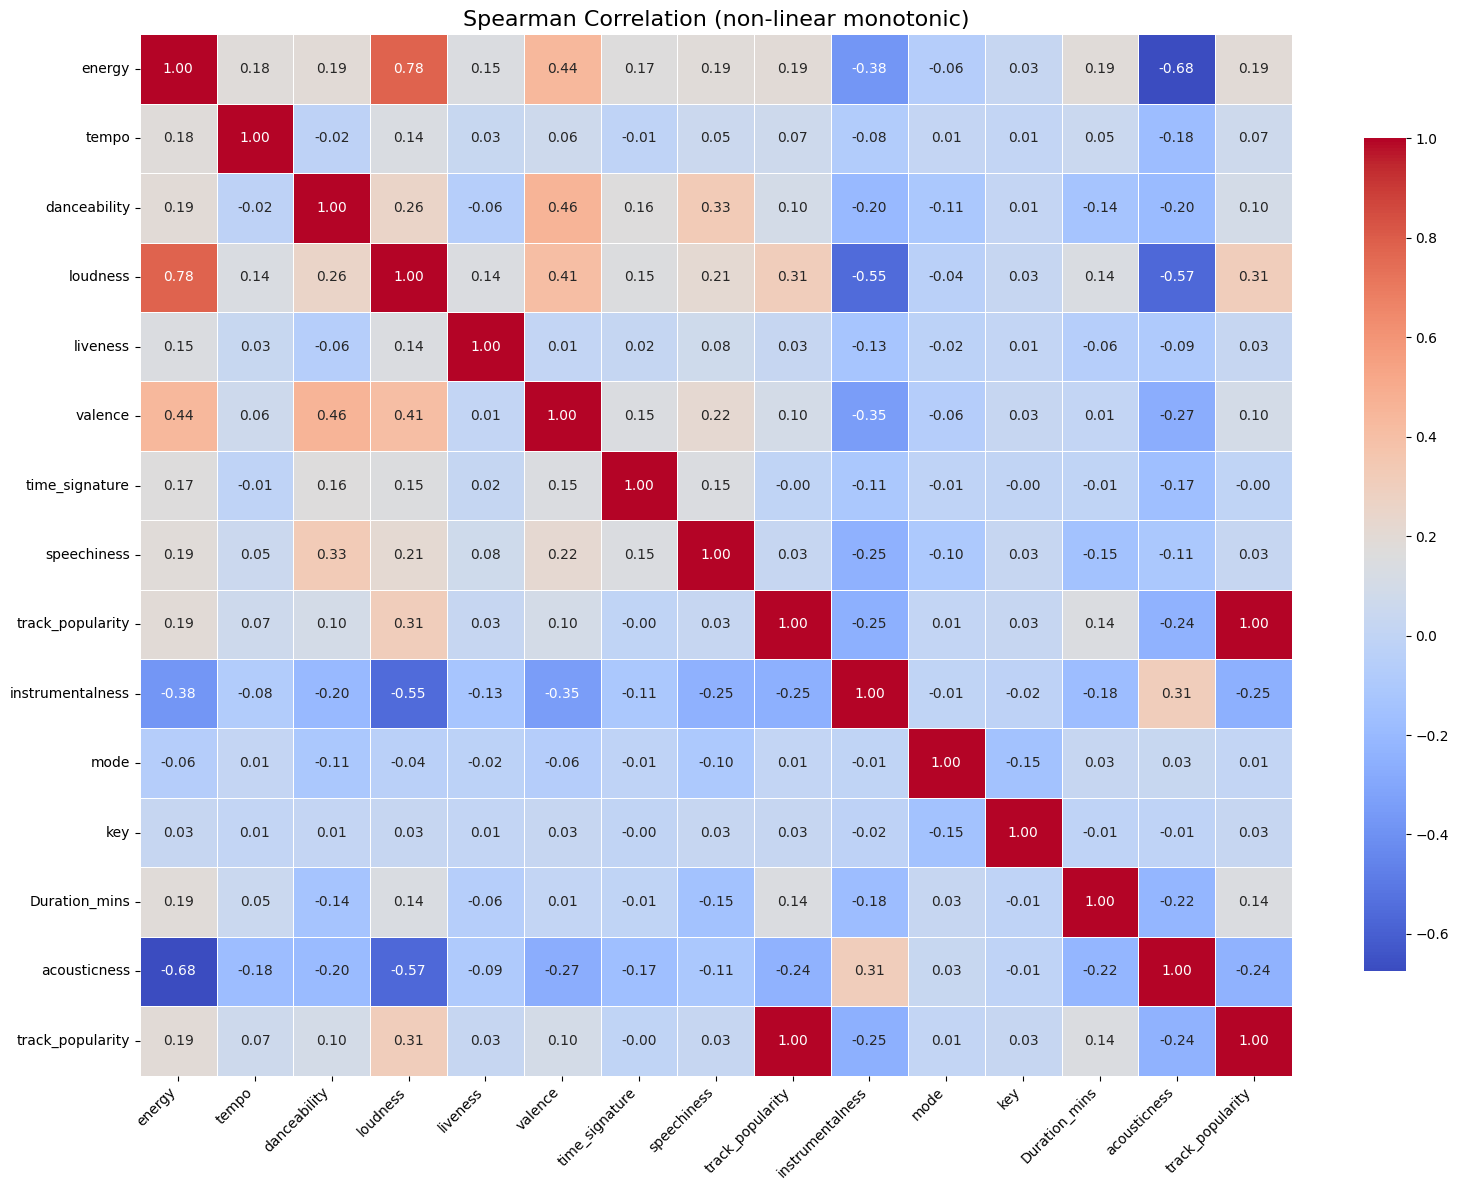

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = df.select_dtypes(include=['number', 'float64', 'int64']).columns.tolist()

corr_spearman = df[num_cols + ['track_popularity']].corr(method='spearman')

plt.figure(figsize=(16, 12)) 
sns.heatmap(
    corr_spearman,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},  
)
plt.title('Spearman Correlation (non-linear monotonic)', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()
plt.show()

The Spearman correlation heatmap above confirms that the relationships between most features and track popularity remain relatively weak. 

However, features such as `loudness`, `energy`, `instrumentalness`, and `acousticness` show the highest correlation scores with `track_popularity`. These variables will be the primary focus for further investigation, as they are the most likely to influence a track’s success despite the overall weak monotonic relationships.

Since the correlation scores were generally low, linear regression plots are unlikely to reveal meaningful insights. Instead, we will start with histogram-based analysis to examine the distribution of these selected features. This will allows us to better understand the range, central tendency, and variability of variables before exploring more complex or non-linear relationships.

<Axes: xlabel='loudness', ylabel='Count'>

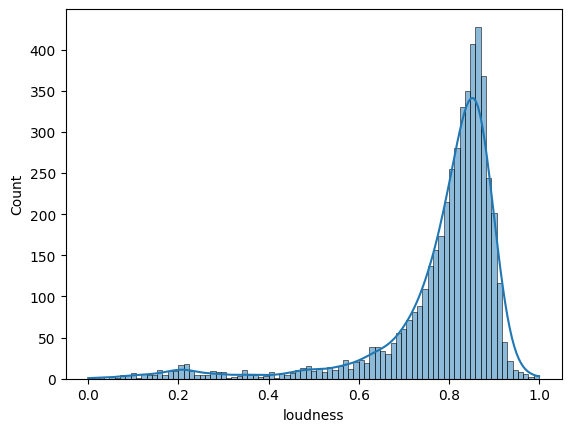

In [76]:
sns.histplot(df['loudness'], kde=True)


<h4>Observations:</h4>

- The distribution is strongly right-skewed, with a peak between -12 and -6 dB, where the majority of tracks are found in the dataset.
- Most values fall within -20 to -5 dB, indicating that extremely quiet or extremely loud tracks are uncommon.
- The distribution has a long left tail and a steep drop-off on the right, showing it is clearly not symmetric or normally distributed.

Overall, it is a <b>right-skewed, unimodal distribution</b>, with very few extremely quiet tracks present and almost no extremely loud tracks.

While histograms show the overall frequency distribution, to gain a deeper understanding of variation across the dataset, we will use <b>violin plots.</b> This allows us to see not only where most values lie, but also the spread, median, and variability of the features we are analysing.

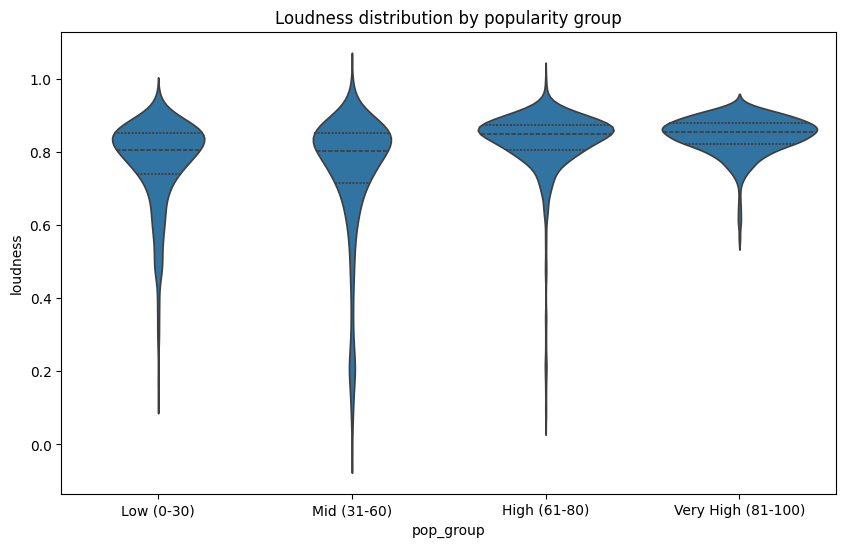

In [77]:
bins = [-np.inf, 30, 60, 80, np.inf]
labels = ['Low (0-30)', 'Mid (31-60)', 'High (61-80)', 'Very High (81-100)']
df['pop_group'] = pd.cut(df['track_popularity'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='pop_group',
    y='loudness',
    order=['Low (0-30)', 'Mid (31-60)', 'High (61-80)', 'Very High (81-100)'],
    inner='quartile'
)
plt.title("Loudness distribution by popularity group")
plt.show()


<h4>Observations:</h4>

- There is a clear upward shift in median loudness as popularity increases. Low and mid-popularity tracks have medians around –12 to –10 dB, with long lower tails extending to –50 dB, while high and very high popularity tracks shift to –8 to –6 dB with much shorter lower tails.
- Extremely quiet tracks (< –20 to –25 dB) are almost entirely absent in the very high popularity group.
- High popularity tracks are largely concentrated in the –15 to –5 dB range.

This indicates that loudness could be a strong predictor of track popularity, as there is fairly clear separation between popularity groups.

Now, we will repeat the process for other variables, starting with `instrumentalness`:

<Axes: xlabel='instrumentalness', ylabel='Count'>

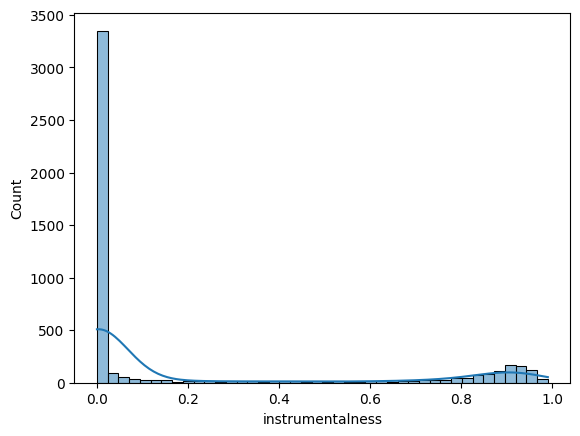

In [78]:
sns.histplot(df['instrumentalness'], kde=True)

<h4>Observations</h4>

- Like loudness, the distribution is right-skewed, but far more extreme, with a very long, thin right tail.
- There is a large spike at 0.0, with over 3,400 tracks, indicating that the vast majority of songs contain vocals.
- The distribution is overwhelmingly concentrated near 0, with almost no tracks in the mid-to-high range

This suggests that fully instrumental tracks are rare in this dataset.

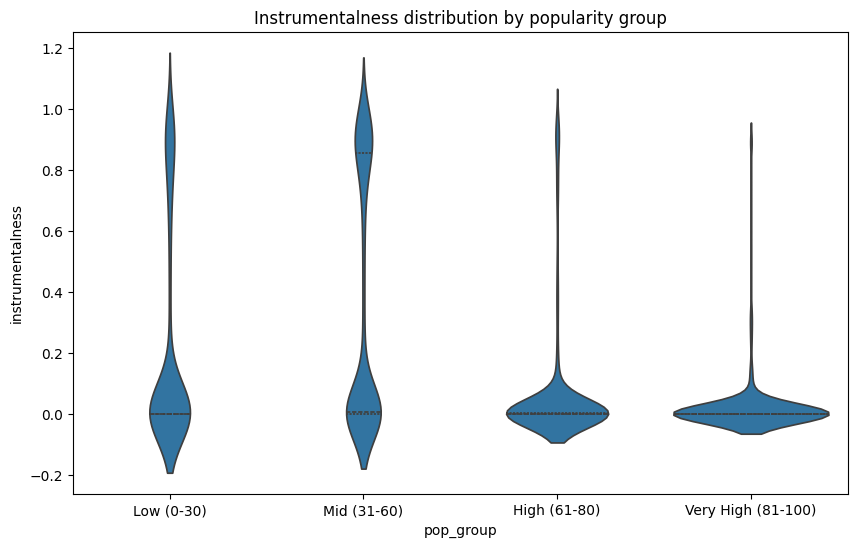

In [79]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='pop_group',
    y='instrumentalness',
    order=['Low (0-30)', 'Mid (31-60)', 'High (61-80)', 'Very High (81-100)'],
    inner='quartile'
)
plt.title("Instrumentalness distribution by popularity group")
plt.show()

<H4>Observations</H4>

- There is a strong ceiling effect. Low and mid-popularity groups have wider violins, with tails extending up to 0.8–1.0.
- The high popularity group narrows, and very high popularity tracks form an almost spike at or near 0.0, with virtually no spread above ~0.1.
- Tracks with high instrumentalness (>0.3–0.4) are almost entirely in the low/mid-popularity groups, indicating that very popular tracks are overwhelmingly vocal.

This suggests that instrumental tracks are less likely to achieve high popularity, making instrumentalness a potentially useful predictor. However, its informativeness is limited within the dominant near-zero range.

<Axes: xlabel='acousticness', ylabel='Count'>

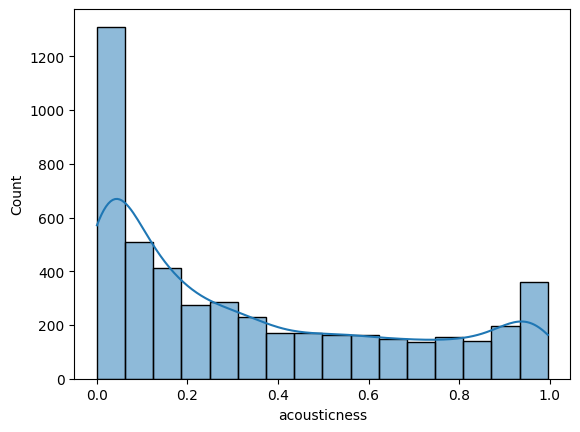

In [80]:
sns.histplot(df['acousticness'], kde=True)

<h4>Observations</h4>

- The distribution is strongly right-skewed, with a noticeable peak near 0.0 and an irregular tail extending toward higher values.
- There is a tall spike at 0.0, indicating that most tracks in the dataset have little or no acoustic content.
- Values drop rapidly from 0.0 to ~0.2, then decrease more gradually with a low but consistent count, forming a plateau up to ~0.9.

A slight rise near the upper end indicates a distinct group of fully or nearly fully acoustic tracks, highlighting a small subset of purely acoustic songs.

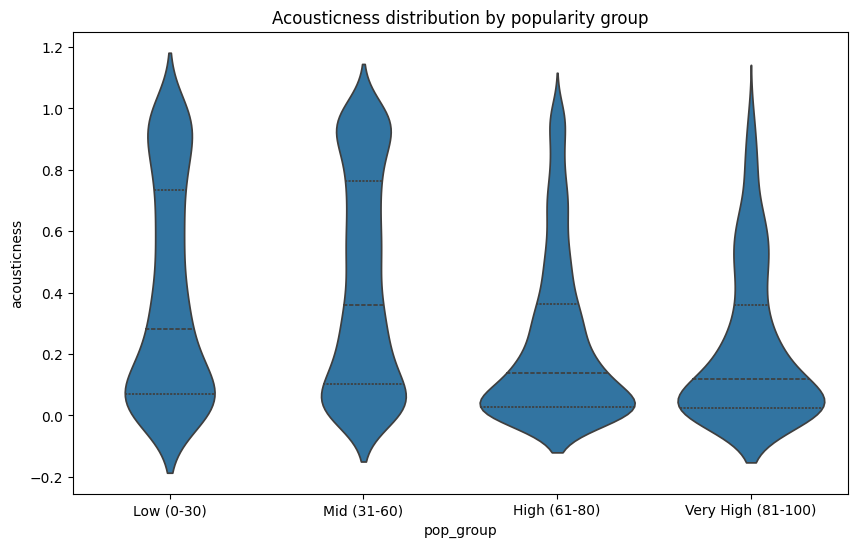

In [81]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='pop_group',
    y='acousticness',
    order=['Low (0-30)', 'Mid (31-60)', 'High (61-80)', 'Very High (81-100)'],
    inner='quartile'
)
plt.title("Acousticness distribution by popularity group")
plt.show()

<h4>Observations:</h4>

- As popularity increases, the violins progressively narrow, with values squeezing toward 0.
- Low and mid-popularity groups have wide distributions with long right tails and noticeable density near 1.0, which hints at a mix of acoustic and non-acoustic tracks.
- High and very high popularity groups are much narrower and heavily concentrated near 0, with the very high popularity group showing the least spread and the lowest median and upper tail.

This pattern suggests that high acousticness strongly reduces the likelihood of very high popularity, making acousticness a potentially useful negative predictor.

Overall, there is some clear separation between popularity groups based on acousticness, which adds to the evidence that it could be relevant in predicting track popularity.

<Axes: xlabel='Duration_mins', ylabel='Count'>

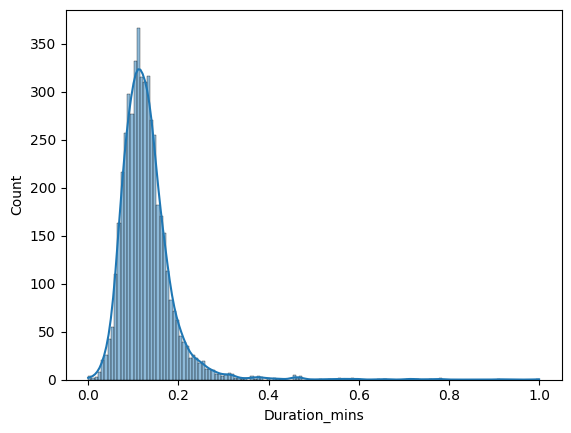

In [108]:
sns.histplot(df['Duration_mins'], kde=True)

<h4>Observations</h4>

- The distribution is roughly unimodal and somewhat symmetric compared to previous features like loudness or instrumentalness.
- There is a noticeable left skew, with a longer tail toward lower energy values.
- The mode lies in the 0.6–0.8 range, indicating that the majority of tracks are moderately to very energetic.
- There is a small dip at low energies, followed by a gradual rise to the mode, which suggests there is a small group of low-energy tracks in the dataset.

Overall, this feature is broadly distributed, and there is a large variance of energy levels across tracks.

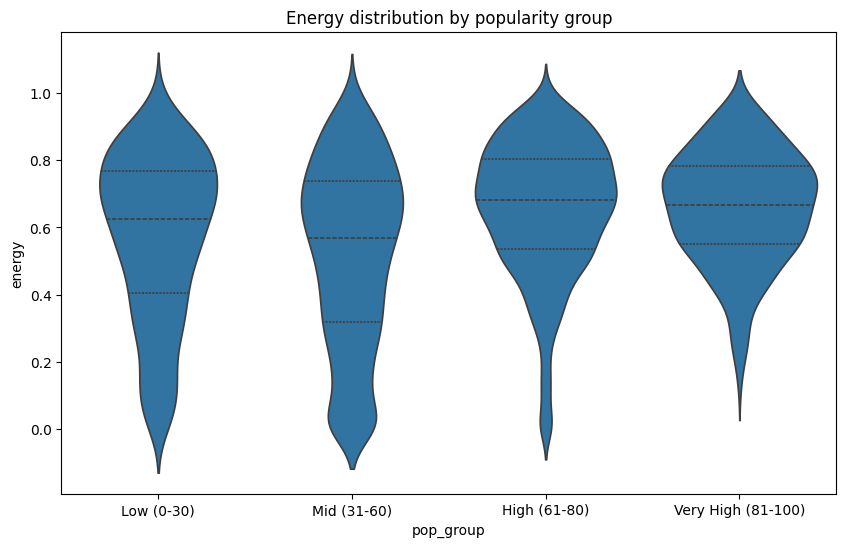

In [83]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='pop_group',
    y='energy',
    order=['Low (0-30)', 'Mid (31-60)', 'High (61-80)', 'Very High (81-100)'],
    inner='quartile'
)
plt.title("Energy distribution by popularity group")
plt.show()

<h4>Observations</h4>

- There is an upward shift in the median energy as popularity increases. The low-popularity group has the lowest median (~0.6) with a long lower tail extending toward 0.
- Mid-popularity tracks show slightly higher medians, while high and very high popularity groups have the highest medians (~0.7–0.75) and shorter lower tails.
- Very low-energy tracks (<0.3–0.4) are rare in the high and very high popularity groups.
- Higher-popularity tracks are largely located in the 0.6–1.0 range, suggests that generally higher energies are associated with greater popularity.

Overall, higher energy increases the likelihood of higher popularity, which would make it useful for filtering out low-energy tracks, though the overlap between popularity groups is greater compared to other features like `loudness` or `acousticness`.

<h3>Categorical Features</h3>

In [84]:
category_cols = ['playlist_genre', 'mode', 'key', 'playlist_subgenre', 'type']

for col in category_cols:
    print(f"\n{col}")
    print(df[col].value_counts())


playlist_genre
playlist_genre
electronic    589
pop           515
latin         425
hip-hop       395
ambient       359
rock          345
lofi          298
world         228
arabic        208
brazilian     148
jazz          146
gaming        133
classical     121
blues          88
afrobeats      82
wellness       80
punk           74
turkish        71
folk           68
indian         57
r&b            50
metal          49
soul           44
gospel         39
korean         34
funk           28
cantopop       27
reggae         24
j-pop          23
indie          17
k-pop          16
soca           14
mandopop       14
country        11
disco           9
Name: count, dtype: int64

mode
mode
1.0    2715
0.0    2114
Name: count, dtype: int64

key
key
1.0     587
0.0     509
7.0     476
2.0     461
9.0     430
11.0    416
5.0     408
6.0     386
4.0     361
8.0     318
10.0    316
3.0     161
Name: count, dtype: int64

playlist_subgenre
playlist_subgenre
modern         694
chill          41

Examination of value counts for each of the categorical columns reveals that there are class imbalances in `playlist_genre`, with some genres represented far less frequently than others. To address this, rare genres can be combined into a single category, such as “Other”, which reduces sparsity and improves representation. 

Additionally, class imbalance techniques can be applied during model building to ensure that underrepresented genres are properly accounted for and do not bias the model.

To understand how track popularity varies by playlist genre, we examine the relationship between average popularity and each genre. A boxplot would be the most appropriate choice here, given that it is a categorical feature and would provide a clear visualization of the distribution of popularity within each genre. It can highlight differences in medians and spread.

C:\Users\kavas\AppData\Local\Temp\ipykernel_12080\1822503449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


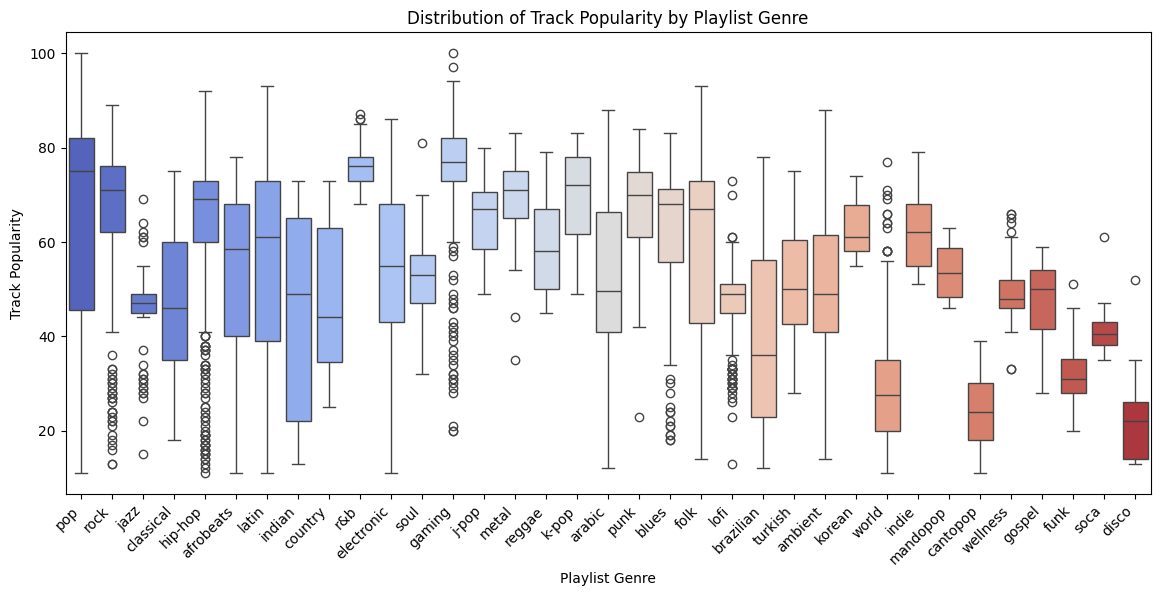

In [85]:
plt.figure(figsize=(14,6))

# Option 1: Boxplot (shows median, quartiles, outliers)
sns.boxplot(
    data=df,
    x='playlist_genre',
    y='track_popularity',
    palette='coolwarm'
)

plt.title('Distribution of Track Popularity by Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45, ha='right') 
plt.show()


<h4>Observations</h4>

- Median popularity varies significantly by genre. Popular mainstream genres such as pop, hip-hop, EDM, Latin, and K-pop tend to have higher medians, while niche genres like classical, jazz, disco, and wellness have lower medians.

- This indicates that genre alone provides prior information about a track’s expected popularity, even before considering other features.

- Variance differs across genres: high-variance genres (e.g., EDM, pop) have a greater potential for viral hits, while low-variance genres (e.g., jazz, classical) are more predictable but capped in popularity.
- The shapes and spreads of popularity distributions differ by genre, suggesting that genre captures real underlying differences in audience size and exposure.

There is some overlap present, however. A low-popularity track in pop and a high-popularity track in jazz can have similar popularity scores, highlighting that genre alone is not fully determinative - this suggests further multivariate analysis would be useful.

Genres like pop, hip-hop, and electronic show large spreads, further underscoring that other features in addition to genre influence popularity. These variables will be investigated in subsequent analysis.

<Axes: xlabel='time_signature', ylabel='track_popularity'>

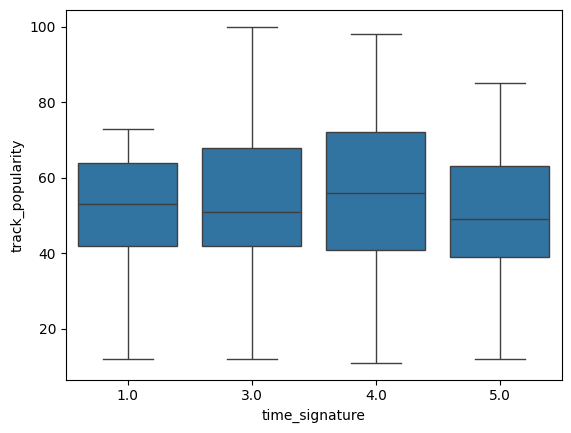

In [86]:
sns.boxplot(x="time_signature", y="track_popularity", data=df)

<h4>Observations</h4>

- The distributions and medians of track popularity across different time signatures show little separation and substantial overlap.
- This suggests that time signature provides minimal information about a track’s popularity.

As a result, time signature is unlikely to be a strong or useful predictor of popularity compared to other audio features.

<Axes: xlabel='mode', ylabel='track_popularity'>

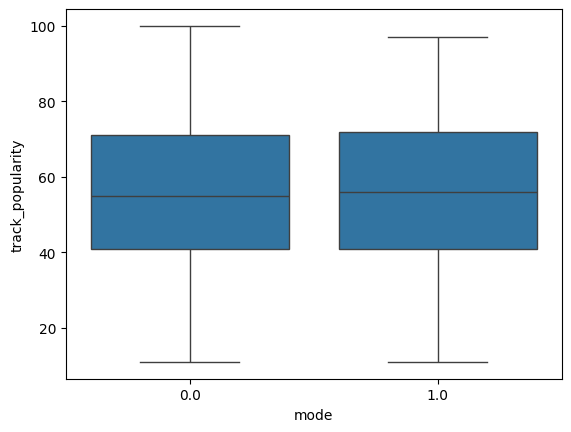

In [87]:
sns.boxplot(x="mode", y="track_popularity", data=df)

<h4>Observations</h4>

- The popularity distributions for major and minor modes show very similar medians and spreads, with substantial overlap between the two groups.
- This indicates that mode provides little discriminatory power in explaining differences in track popularity.

Consequently, mode is unlikely to be a strong predictor of popularity when compared to other audio features.

<Axes: xlabel='key', ylabel='track_popularity'>

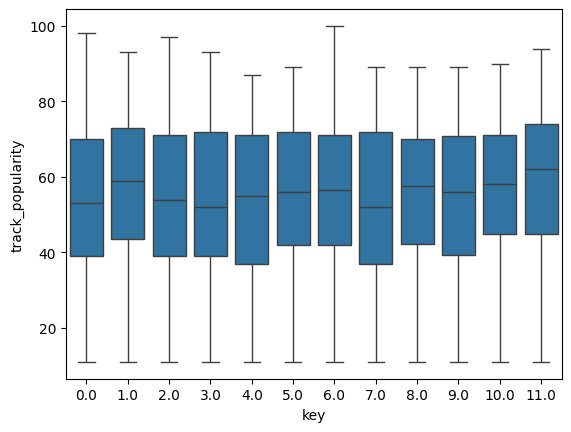

In [107]:
sns.boxplot(x="key", y="track_popularity", data=df)

<h4>Observations</h4>

- Popularity distributions across musical keys show substantial overlap, with no clear or consistent differences in medians between keys.
- This suggests that musical key alone has little influence on a track’s popularity.

As a result, key is unlikely to be a meaningful predictor of popularity compared to other audio or contextual features.

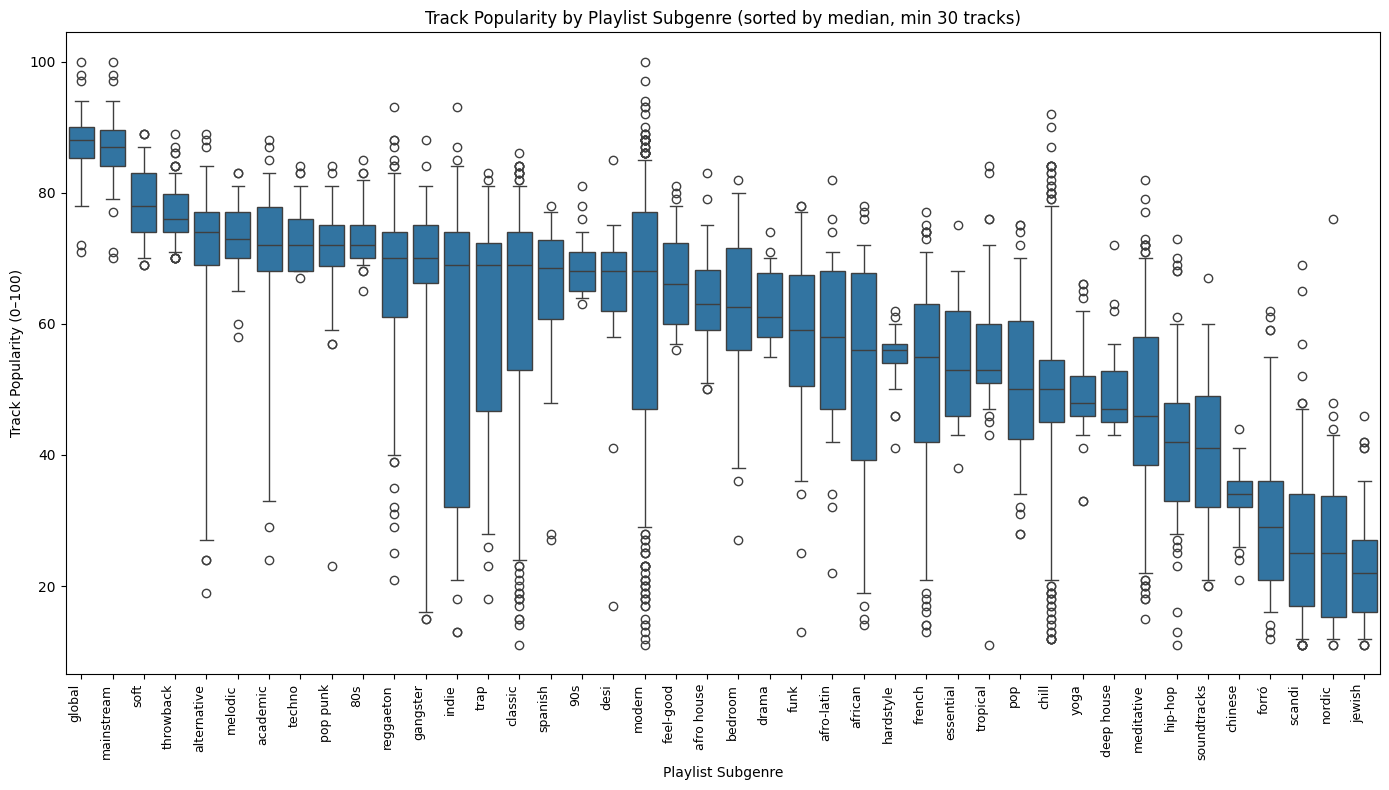

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to subgenres with at least 30–50 tracks to reduce noise
min_count = 30
valid_subgenres = df['playlist_subgenre'].value_counts()[lambda x: x >= min_count].index
df_filtered = df[df['playlist_subgenre'].isin(valid_subgenres)]

# Sort by median popularity (descending)
median_order = (
    df_filtered.groupby('playlist_subgenre')['track_popularity']
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(14, 8))
sns.boxplot(                    
    data=df_filtered,
    x='playlist_subgenre',
    y='track_popularity',
    order=median_order,
    whis=[5, 95]                # ignore outliers
)
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.title("Track Popularity by Playlist Subgenre (sorted by median, min 30 tracks)")
plt.xlabel("Playlist Subgenre")
plt.ylabel("Track Popularity (0–100)")
plt.tight_layout()
plt.show()

<h4>Observations</h4>

- Median popularity varies widely across subgenres, with a ~65 gap between the highest (e.g. mainstream, soft, throwback, reggaeton) and lowest (e.g. meditative, yoga, chill, niche/world) groups, which shows that it is capable of explaining popularity fairly effectively as a single categorical feature.
- Maximum popularity levels for mainstream and global subgenres is very high (many tracks reaching 80–100 popularity), while niche subgenres are capped far lower.
- High-median subgenres tend to have wider spreads, whereas low-median subgenres are more tightly clustered at low popularity levels.
- However, there is minimal overlap between top-tier and bottom-tier subgenres, making it unlikely for tracks in niche categories to reach the popularity levels of mainstream genres.

Playlist subgenre could be a good predictor for track popularity, particularly effective for ruling out unlikely hits, and more informative than other individual audio features such as loudness or energy. However, it wouldn't be deterministic and further multivariate analysis is required for this variable.

<h2>Multivariate Analysis</h2>

To extend the earlier univariate analysis of the relationship between loudness, playlist genre and track popularity, we now perform a multivariate analysis that incorporates playlist genre. Specifically, we will group tracks by playlist genre and loudness category to examine how average popularity varies across genres at different loudness levels.

This approach allows us to assess whether the relationship between loudness and popularity is consistent across genres or whether certain genres benefit more from louder production than others. By conditioning on genre, we can gain a more deeper understanding of how audio characteristics and contextual factors interact to influence popularity.

In [90]:
# Bin loudness
df['loudness_bin'] = pd.qcut(
    df['loudness'], 
    3, 
    labels=['Low', 'Medium', 'High']
)


df_gptest = df[['playlist_genre', 'loudness_bin', 'track_popularity']]

grouped_test1 = (
    df_gptest
    .groupby(['playlist_genre', 'loudness_bin'], as_index=False)
    .mean()
)

# Pivot table
df_pivot = grouped_test1.pivot(
    index='playlist_genre',
    columns='loudness_bin',
    values='track_popularity'
)

df_pivot = df_pivot.fillna(0)
df_pivot

C:\Users\kavas\AppData\Local\Temp\ipykernel_12080\1996116037.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['playlist_genre', 'loudness_bin'], as_index=False)


loudness_bin,Low,Medium,High
playlist_genre,,,
afrobeats,44.565217,47.562500,65.333333
ambient,50.965278,49.671429,48.720000
arabic,40.818182,53.021505,56.056338
blues,53.735294,61.085714,68.684211
brazilian,35.057143,33.963636,47.913793
cantopop,26.466667,19.750000,27.250000
classical,47.184211,40.428571,0.000000
country,50.571429,44.750000,0.000000
disco,22.833333,14.000000,32.500000


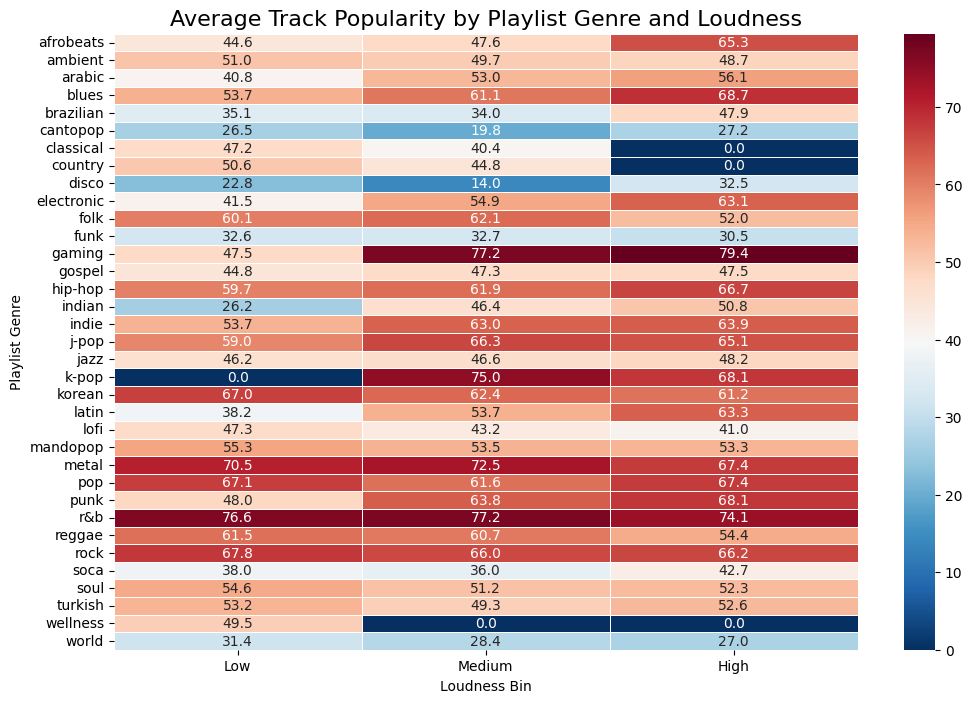

In [91]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap='RdBu_r', linewidths=0.5)
plt.title("Average Track Popularity by Playlist Genre and Loudness", fontsize=16)
plt.ylabel("Playlist Genre")
plt.xlabel("Loudness Bin")
plt.show()

<h4>Observations</h4>

- From the heatmap, we can clearly see that louder tracks tend to be more popular, but the effect is strongly genre-dependent.
  
- Mainstream and high-energy genres (e.g. pop, reggaetón, hip-hop, Latin, K-pop, rock, metal) consistently show higher average popularity in high-loudness categories.

  
- Some genres are largely not affected by loudness or negatively affected. Acoustic, dynamic, or niche genres (e.g. classical, jazz, ambient, folk, wellness) show little to no improvement in popularity, and sometimes declines as loudness increases.

Certain genres benefit significantly from loudness. Genres such as reggaetón, gaming, and Latin exhibit the largest popularity gains at higher loudness levels, suggesting these production styles favour more noise. Loudness is an important factor, but its impact on popularity is further enhanced if it aligns with genre-specific listening preferences. 

Building on the previous multivariate analysis, we now examine energy in combination with playlist genre to assess how average track popularity varies across genres at different levels of instrumental content.

In [112]:
# Bin energy
df['energy_bin'] = pd.qcut(
    df['energy'], 
    3, 
    labels=['Low', 'Medium', 'High']
)


df_gptest2 = df[['playlist_genre', 'energy_bin', 'track_popularity']]

grouped_test2 = (
    df_gptest2
    .groupby(['playlist_genre', 'energy_bin'], as_index=False)
    .mean()
)

# Pivot table
df_pivot2 = grouped_test2.pivot(
    index='playlist_genre',
    columns='energy_bin',
    values='track_popularity'
)

df_pivot2 = df_pivot2.fillna(0)
df_pivot2


C:\Users\kavas\AppData\Local\Temp\ipykernel_12080\3330580004.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['playlist_genre', 'energy_bin'], as_index=False)


energy_bin,Low,Medium,High
playlist_genre,,,
afrobeats,49.625000,54.268293,51.181818
ambient,52.906250,47.589552,47.769231
arabic,45.414634,55.370000,49.373134
blues,53.897959,67.642857,66.818182
brazilian,42.814815,38.436364,39.454545
cantopop,24.157895,20.000000,29.000000
classical,48.359223,35.846154,43.000000
country,49.444444,44.000000,0.000000
disco,17.500000,22.000000,26.500000


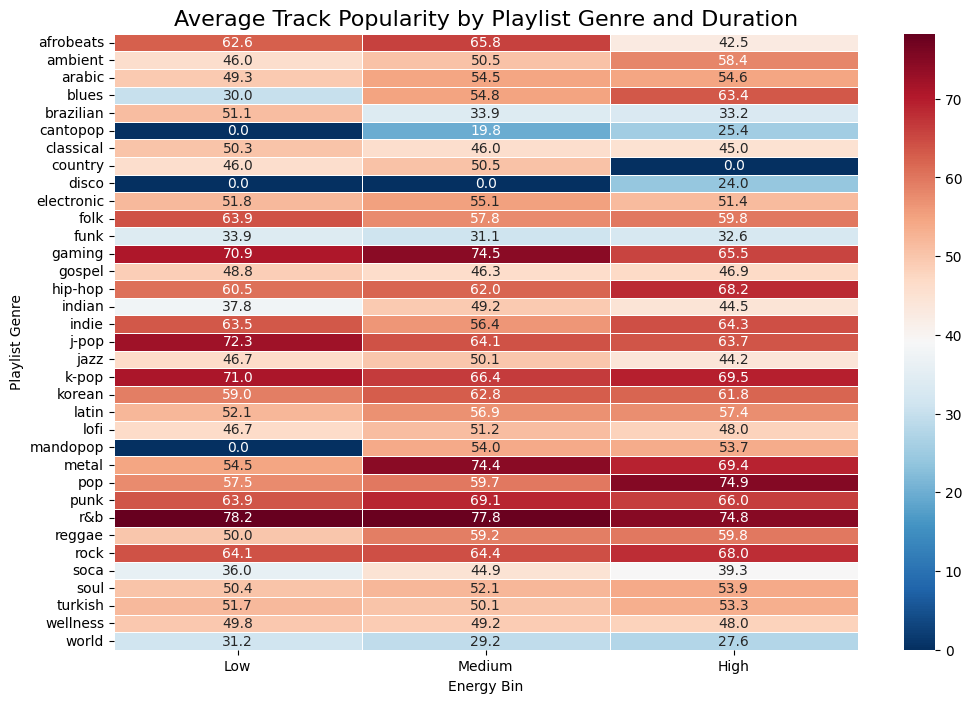

In [111]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot2, annot=True, fmt=".1f", cmap='RdBu_r', linewidths=0.5)
plt.title("Average Track Popularity by Playlist Genre and Energy", fontsize=16)
plt.ylabel("Playlist Genre")
plt.xlabel("Energy Bin")
plt.show()

<h4>Observations</h4>

- Similar to loudness, the relationship between energy–popularity relationship is strongly dependent on genre.
  
- High-energy tracks are more popular in mainstream, dance, and aggressive genres (e.g., reggaetón, hip-hop, pop, metal, punk, rock, gaming), but the same trend does not hold universally.

  
- Genres such as reggaetón, R&B, gaming, metal, punk, and rock show clear popularity gains (+5 to +30 points) as energy increases, reflecting listener preference for more intensity.

  
- Classical, jazz, country, disco, and wellness show declining popularity at high energy levels, in line with expectations for these genres; as these tracks tend to be more dynamic and calm in nature.

Energy can be a strong predictor for a track's popularity when used alongside genre - although its predictive value depends heavily on genre context.

Now, we'll extend the multivariate analysis to `playlist_subgenre` and `instrumentalness`.

If we group tracks by playlist subgenre and binned instrumentalness levels, we can assess how the presence (or absence) of vocals influences average track popularity across different subgenres. This analysis builds on earlier univariate findings, where instrumentalness showed a strong negative association with popularity, by testing whether this relationship holds uniformly across subgenres or varies depending on stylistic context.

In [94]:
# Bin instrumentalness
df['instrumentalness_bin'] = pd.qcut(
    df['instrumentalness'], 
    3, 
    labels=['Low', 'Medium', 'High']
)


df_gptest3 = df[['playlist_subgenre', 'instrumentalness_bin', 'track_popularity']]

grouped_test3 = (
    df_gptest3
    .groupby(['playlist_subgenre', 'instrumentalness_bin'], as_index=False)
    .mean()
)

# Pivot table
df_pivot3 = grouped_test3.pivot(
    index='playlist_subgenre',
    columns='instrumentalness_bin',
    values='track_popularity'
)

df_pivot3 = df_pivot3.fillna(0)
df_pivot3


C:\Users\kavas\AppData\Local\Temp\ipykernel_12080\3123465930.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['playlist_subgenre', 'instrumentalness_bin'], as_index=False)


instrumentalness_bin,Low,Medium,High
playlist_subgenre,,,
80s,75.363636,72.384615,73.375000
90s,69.352941,67.523810,69.000000
academic,66.666667,67.428571,68.428571
african,58.500000,64.470588,28.933333
afro house,0.000000,68.000000,63.272727
...,...,...,...
trap,61.586957,56.250000,80.500000
tropical,59.666667,55.233333,54.652174
vaporwave,0.000000,61.000000,66.000000


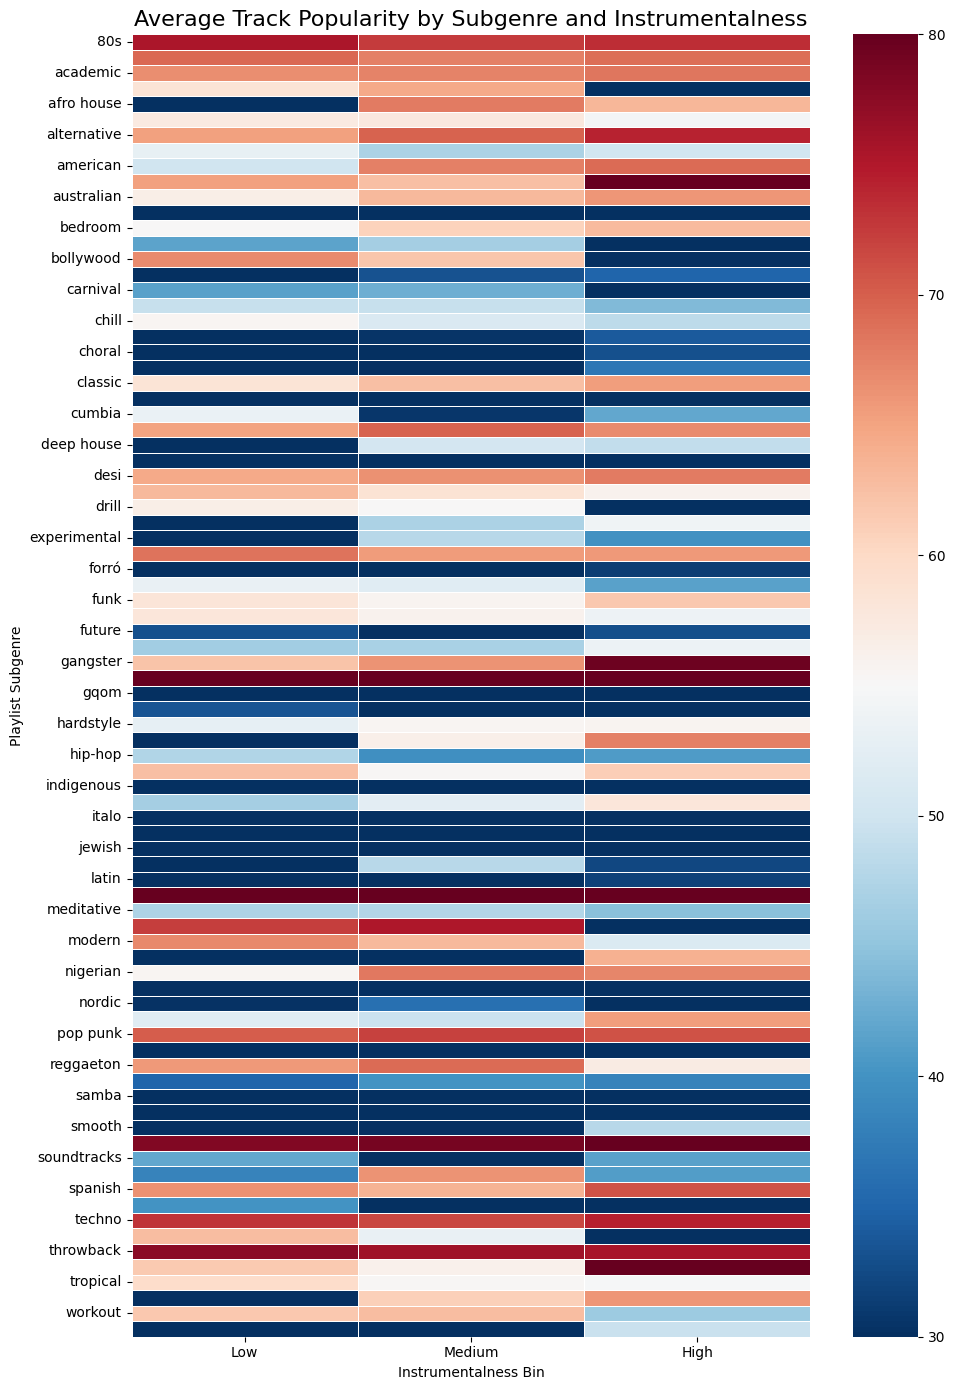

In [95]:
plt.figure(figsize=(10, 14))

sns.heatmap(
    df_pivot3,
    cmap="RdBu_r",
    linewidths=0.5,
    vmin=30,
    vmax=80
)

plt.title(
    "Average Track Popularity by Subgenre and Instrumentalness",
    fontsize=16
)
plt.ylabel("Playlist Subgenre")
plt.xlabel("Instrumentalness Bin")
plt.tight_layout()
plt.show()


<h4>Observations</h4>

- Low instrumentalness (strong vocal presence) is strongly associated with higher popularity in many subgenres such as reggaetón, hip-hop, Latin, tropical, pop punk, workout, gangster, gqom, desi/bollywood, Nigerian, drill, Spanish, etc. This suggests that lyrics, and singing/rapping drives engagement and playlist retention.

- Purely instrumental tracks generally underperform in vocal-driven subgenres - however, we can see notable exceptions in soundtracks, meditative, experimental, and academic styles.

- Generally, we can estimate that instrumentalness is a negative predictor in ~70–80% of subgenres (vocal-heavy sub-genres and dance).

Low instrumentalness does boost expected popularity in mainstream and popular subgenres, while high instrumentalness can limit appeal for nicher styles. Overall, we can conclude that instrumentalness is a strong, mostly negative predictor, but its impact is conditional according to subgenre context.

In [104]:
# Bin acousticness
df['acousticness_bin'] = pd.qcut(
    df['acousticness'], 
    3, 
    labels=['Low', 'Medium', 'High']
)


df_gptest4 = df[['playlist_subgenre', 'acousticness_bin', 'track_popularity']]

grouped_test4 = (
    df_gptest4
    .groupby(['playlist_subgenre', 'acousticness_bin'], as_index=False)
    .mean()
)

# Pivot table
df_pivot4 = grouped_test4.pivot(
    index='playlist_subgenre',
    columns='acousticness_bin',
    values='track_popularity'
)

df_pivot4 = df_pivot4.fillna(0)
df_pivot4


C:\Users\kavas\AppData\Local\Temp\ipykernel_12080\2288065033.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['playlist_subgenre', 'acousticness_bin'], as_index=False)


acousticness_bin,Low,Medium,High
playlist_subgenre,,,
80s,73.296296,73.294118,73.000000
90s,67.857143,68.600000,72.500000
academic,79.000000,59.000000,68.704545
african,38.062500,55.833333,63.400000
afro house,63.807692,60.142857,70.666667
...,...,...,...
trap,70.857143,59.085714,55.363636
tropical,59.352941,54.400000,54.000000
vaporwave,67.818182,67.500000,62.888889


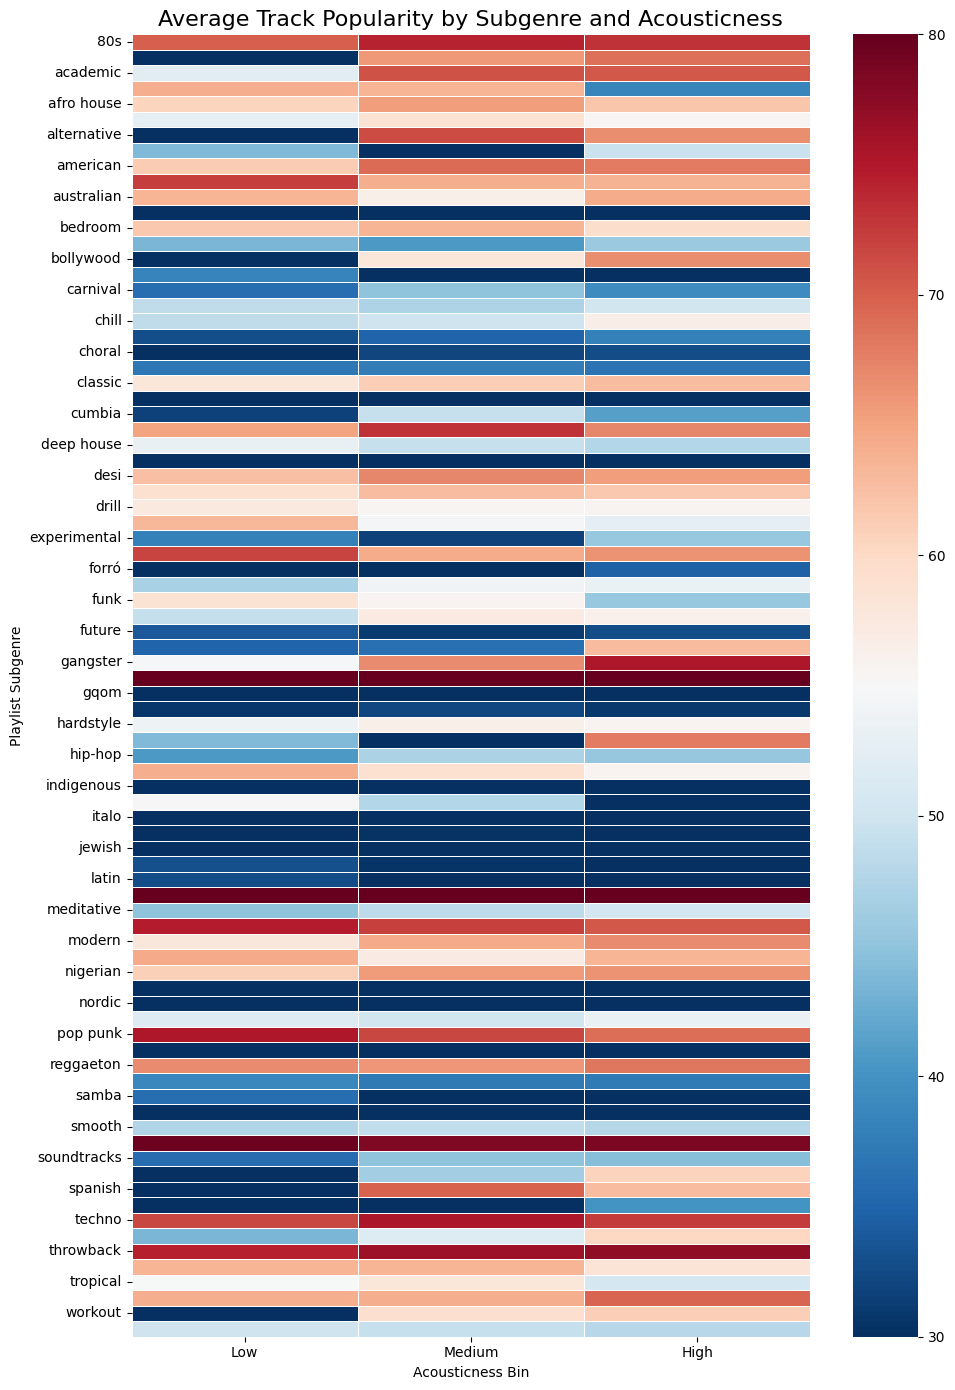

In [103]:
plt.figure(figsize=(10, 14))

sns.heatmap(
    df_pivot4,
    cmap="RdBu_r",
    linewidths=0.5,
    vmin=30,
    vmax=80
)

plt.title(
    "Average Track Popularity by Subgenre and Acousticness",
    fontsize=16
)
plt.ylabel("Playlist Subgenre")
plt.xlabel("Acousticness Bin")
plt.tight_layout()
plt.show()


<H4>Observations</H4>

- There doesn't appear to be any clear or apparent trend from the heatmap, with little variation in correlation between differing acousticness levels and popularity across genres.

- This is because most rows have very similar colour shades across Low, Medium, and High acoustiness bins, showing that for the majority of subgenres, changing the acoustiness level doesn't meaningfully change average popularity. 
  
- There are negative effects in subgenres such as reggaetón, hip-hop, pop punk, drill, Latin, and other beat-heavy tracks - which confirms the negative effect which we discovered during the univariate analysis


- Acoustiness level is only informative about popularity depending on the subgenre chosen, and only a small selection of subgenres showing a clear trend between acousticness and popularity.


The relationship here is largely inconsistent, implying that it isn't a very impactful feature compared to energy or loudness.

<h2>Conclusion</h2>

Based on the analysis undertaken, the most predictive features for Spotify track popularity are the following continuous variables:

- `instrumentalness`
- `energy`
- `loudness`

Categorical features:
- `playlist_genre`
- `playlist_subgenre`

Instrumentalness shows a strong negative effect in vocal-heavy subgenres, while energy and loudness consistently boost popularity in mainstream, high-intensity, and dance-oriented genres. 

Playlist genre and subgenre show differences in audience size, exposure, and style, which makes them highly informative. 

The relationships between these features and popularity are largely non-linear and dependent on genre and subgenre. This suggests that <b>non-linear models</b>, such as tree-based or gradient boosting methods, would be most appropriate. 

It's also really important to highlight interaction effects when building the model: for example between instrumentalness and subgenre, or energy and genre. This will further capture subtle patterns in the data and improve the model's performance. Focusing on these key features with non-linear modeling will facilitate accurate prediction for track popularity.

<h2>Next Steps</h2>

As mentioned above, based on the EDA and feature analysis, the next stage would involve building non-linear models (for example, <b>gradient boosting </b> or <b>random forests</b> to capture the complex, genre-dependent relationships between audio features and popularity. It will be important to incorporate interaction terms, for example Instrumentalness × Subgenre, Energy × Genre, and Loudness × Genre/Subgenre, to better account for these complex effects. 

Rare or underrepresented genres and subgenres will also need to be combined into an “Other” category, and class imbalance techniques could be applied during training to prevent the model developing a bias toward dominant genres. A stratified cross-validation strategy by genre or subgenre would be useful to ensure the model generalized well across different styles, and model performance can be evaluated within subgenres to check the robustness of the model. 

Of course, there is also scope for further analysis. For the sake of simplicity, I only chose to focus on a few selected features - but according to research, other production features such as `valence`, `danceability`, `song duration` and `tempo` can shape a song's popularity. Other avenues of analysis such as temporal trends and playlist-specific effects could also be explored to investigate how this can further improve the model's predictive ability.